# **HEALTH CARE EXPLORATORY DATA ANALYSIS(EDA)**

Healthcare is a critical domain where data plays pivotal role in understanding patient demographics,medical conditions, and the effectiveness of healthcare services. In this EDA project, we will delve into a synthetic healthcare dataset that mimics real-world data.
This dataset encompasses various aspects of patient information, admission details, medical conditions, and healthcare services, making it a comprehensive dataset for analysis. The primary goal of this project is to explore, clean, and visualize the data to gain insights into healthcare trends and understand the distribution of medical conditions.

**IMPORT NECESSARY LIBRARIES**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as op


**LOADING THE DATASET**

In [17]:
#read_csv functions helps to load the csv file data and create a dataframe in pandas
healthcare = pd.read_csv('healthcare_dataset.csv.zip')
#the below code displays the dataframe transpose for the 1st five rows
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


**DATASET BRIEF OVERVIEW**

In [17]:
#summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [18]:
#computes summary of statistics pertaining to the DataFrame's numeric columns.
healthcare.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


We can understand from the above table that age range of patients is between 18 to 85. The min billing amount is 1000 and maximum billing amount is 49995.

In [19]:
#computes summary of statistics pertaining to the DataFrame's categorical columns.
healthcare.describe(include = 'O')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


In [20]:
# return a tuple with the dimension of the dataframe
healthcare.shape

(55500, 15)

There are 55500 rows and 15 columns in this dataset.

**DATA CLEANING**

In [21]:
#check for NULL values if any in each column
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

There are no null values in our healthcare dataset as the value for all the columns are zero.

In [22]:
#check if there are duplicate records in the data
healthcare.duplicated().sum()

534

In [44]:
healthcare=healthcare.drop_duplicates()

As the result  it means there are 534 duplicate records

In [24]:
healthcare

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [19]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
healthcare['Date of Admission'] = pd.to_datetime(healthcare['Date of Admission'])
healthcare['Discharge Date'] = pd.to_datetime(healthcare['Discharge Date'])


#calculate the no: of days patients got admitted in hospital
healthcare['Days Hospitalized'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days
healthcare['Days Hospitalized'] = healthcare['Days Hospitalized'].astype(int)
healthcare['Days Hospitalized']

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: Days Hospitalized, Length: 55500, dtype: int32

In [20]:
#drop columns irrelevant to our analysis
healthcare = healthcare.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'])
healthcare.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

In [49]:
df=healthcare.groupby('Days Hospitalized',as_index=False)['Billing Amount'].mean()
op.line(df,x='Days Hospitalized',y='Billing Amount',title='Avg Billing Amount By Days')

**DATA EXPLORATION AND VISUALIZATION**

In [28]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('--')

Gender
Male      27496
Female    27470
Name: count, dtype: int64
--
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64
--
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64
--
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64
--
Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64
--
Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64
--
Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64
--


____________________________________________________________________________________________________


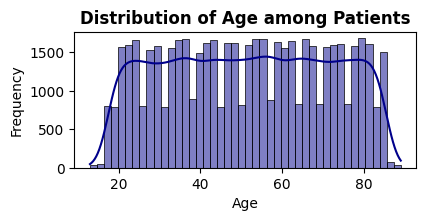

____________________________________________________________________________________________________


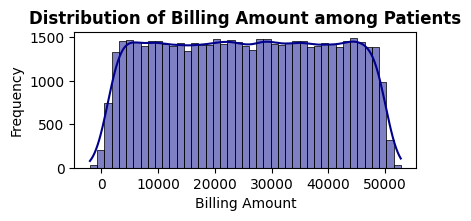

____________________________________________________________________________________________________


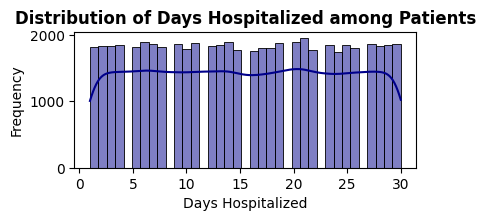

In [29]:
#plotting histograms to find the frequency of numeric columns (age, billing amount and days hospitalized)
for col in healthcare.columns:
    if healthcare[col].dtype == 'int' or healthcare[col].dtype == 'float':
        plt.figure(figsize = (15,6))
        plt.style.use('seaborn-v0_8-dark-palette')
        plt.subplot(3,3,3)
        sns.histplot(healthcare[col],kde = True,color = 'darkblue')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

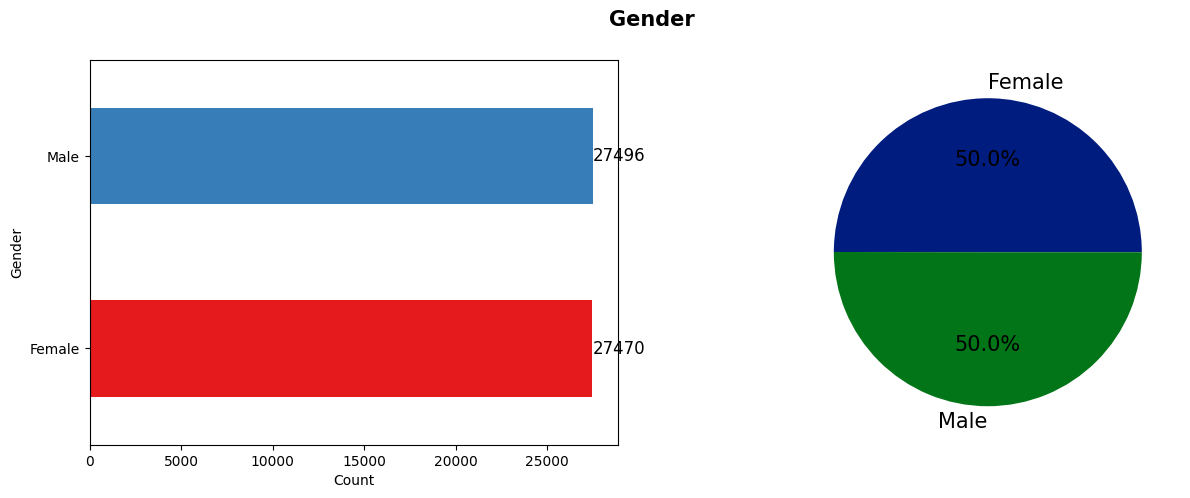

____________________________________________________________________________________________________




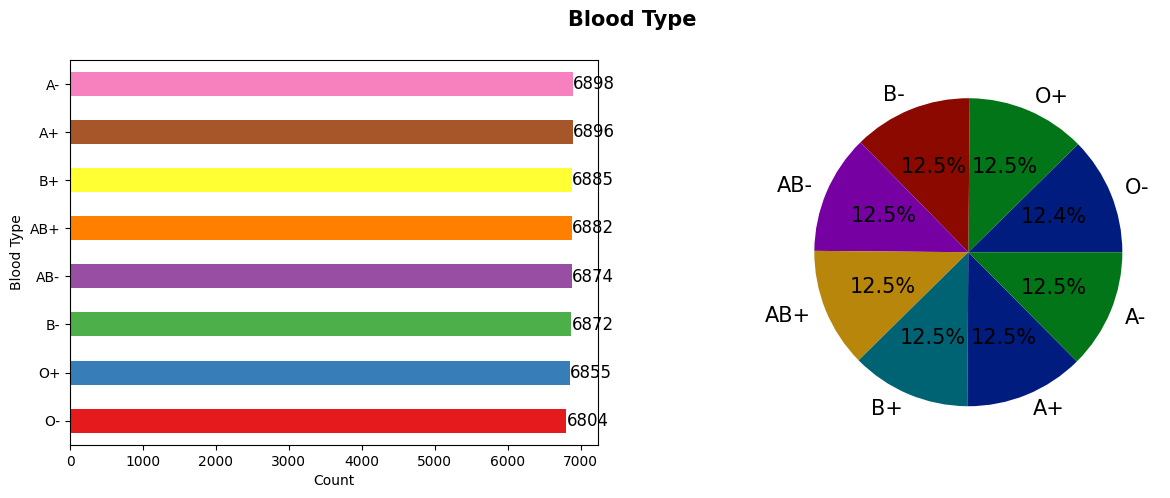

____________________________________________________________________________________________________




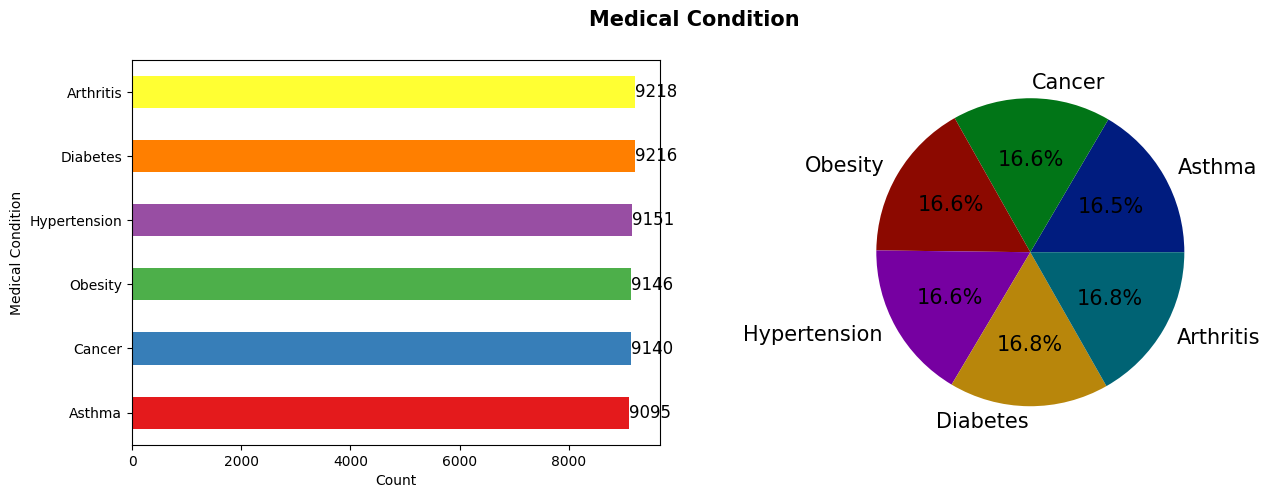

____________________________________________________________________________________________________




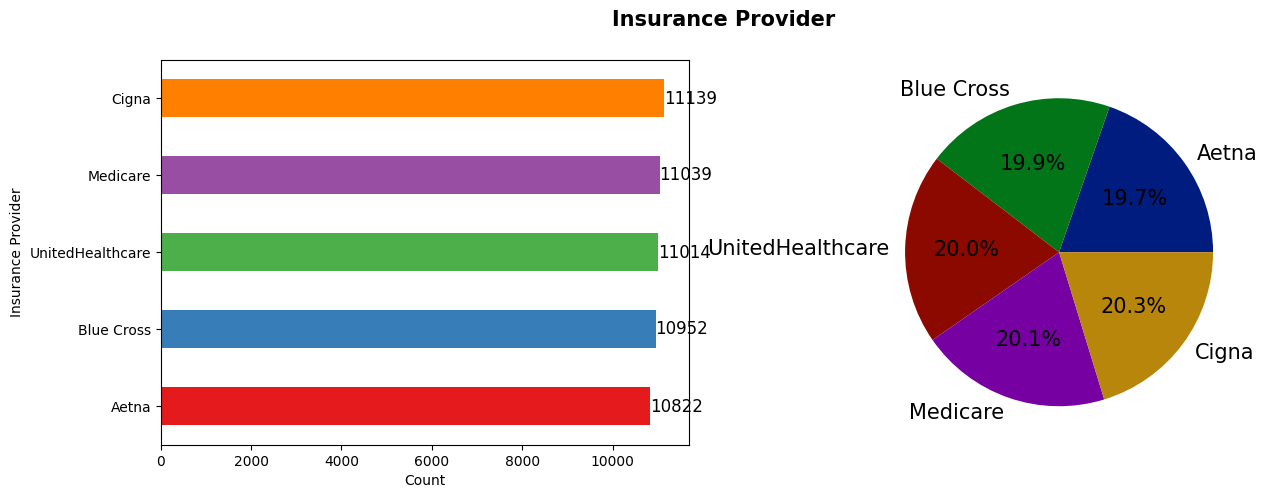

____________________________________________________________________________________________________




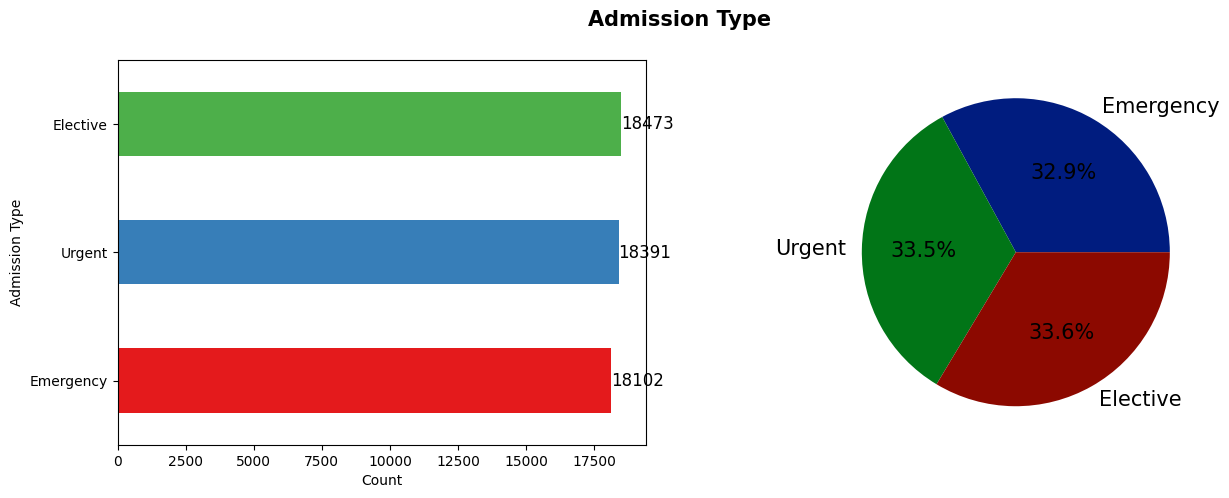

____________________________________________________________________________________________________




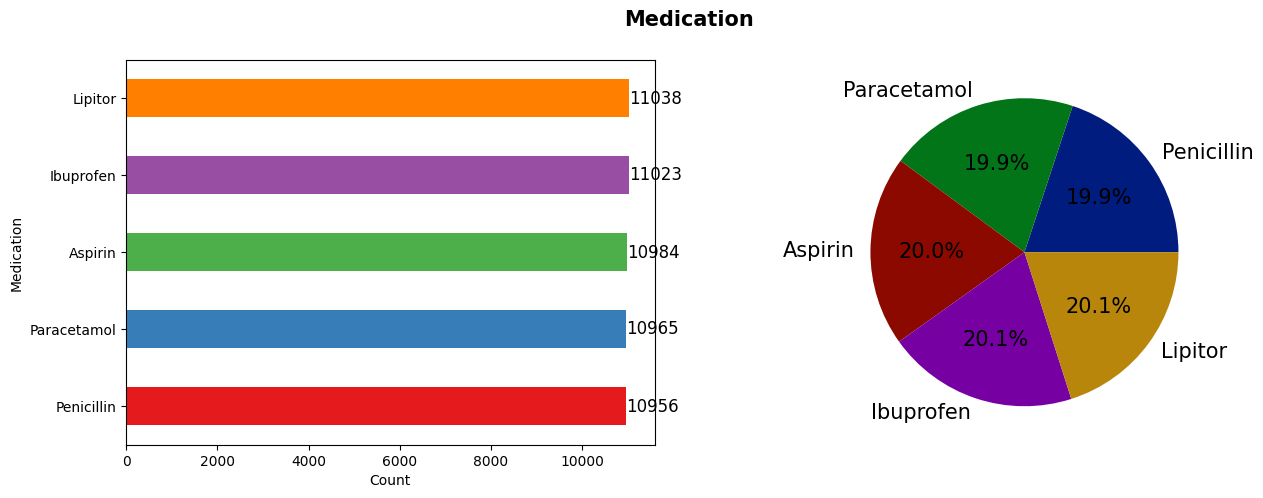

____________________________________________________________________________________________________




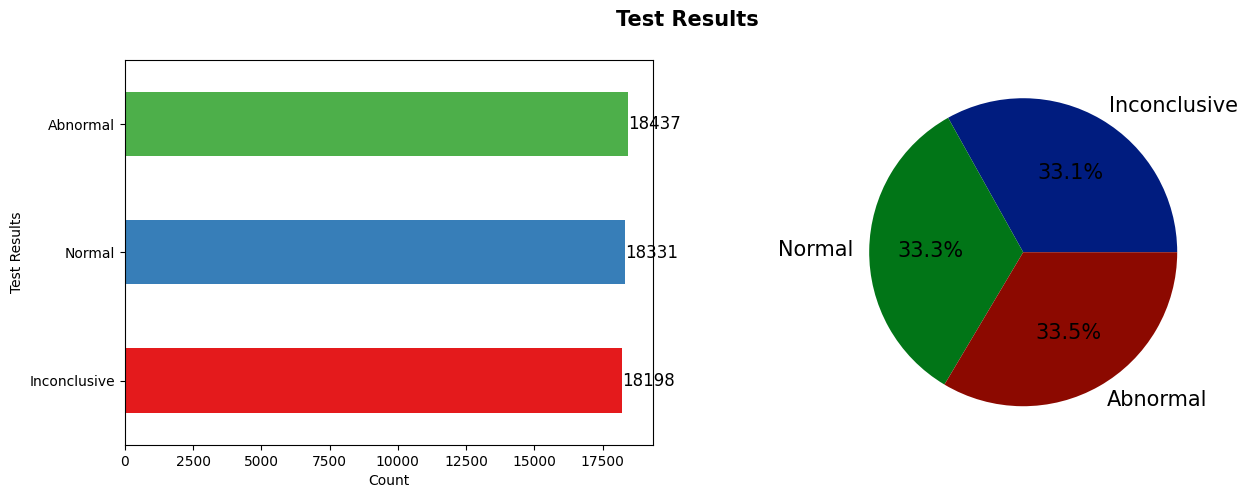

____________________________________________________________________________________________________


In [30]:
#plotting pie chart and bar chart to find the data distribution for categorical columns
#using for loop for visualization of data in categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (15,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = healthcare[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 12,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':15})
        plt.ylabel('')
        plt.show()
        print("_"*100)

**What is the distribution of medical condtions between genders?**

In [31]:
#unstack function converts the data into 2 dimensional
gender_medical = healthcare.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,4642,4576
Asthma,4511,4584
Cancer,4566,4574
Diabetes,4609,4607
Hypertension,4569,4582
Obesity,4573,4573


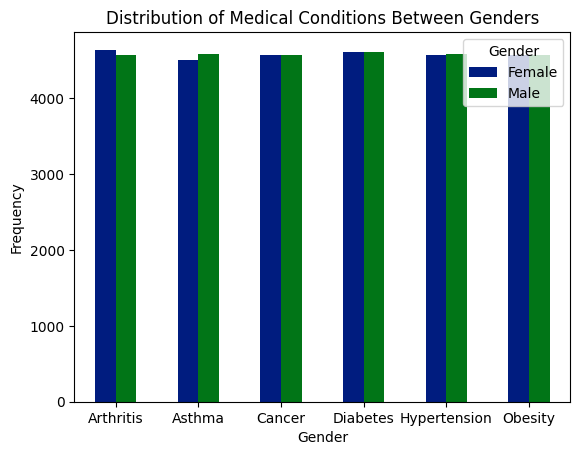

In [32]:
gender_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

***Interpretation***

Female have higher share in majority of the medical conditions. Cancer is leading medical condition among female whereas Hypertension is leading cause among male.

**What is the correlation between age,billing amount and days hospitalized**

In [33]:
# selecting the columns to correlate
correlation_columns = ['Age','Billing Amount','Days Hospitalized']
# creating a df using the above columns
correlate_df = healthcare[correlation_columns]
#encoding categorical columns for correlation
correlate_df['Gender'] = healthcare['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = healthcare['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = healthcare['Test Results'].astype('category').cat.codes
# creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix

/tmp/ipykernel_47/1295703093.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_47/1295703093.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_47/1295703093.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Billing Amount,Days Hospitalized,Gender,Admission Type,Test Results
Age,1.000000,-0.003427,0.007890,-0.002510,0.004098,-0.006974
Billing Amount,-0.003427,1.000000,-0.004891,0.004939,-0.002815,-0.002635
Days Hospitalized,0.007890,-0.004891,1.000000,0.004224,-0.005066,0.001289
Gender,-0.002510,0.004939,0.004224,1.000000,0.009642,0.005073
Admission Type,0.004098,-0.002815,-0.005066,0.009642,1.000000,-0.000602
Test Results,-0.006974,-0.002635,0.001289,0.005073,-0.000602,1.000000


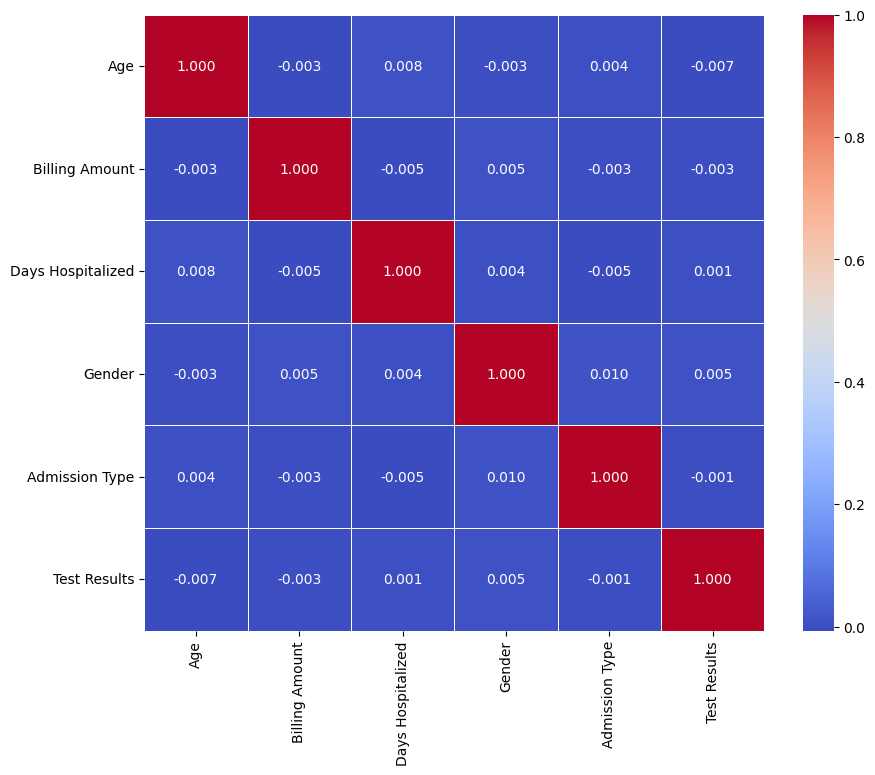

In [34]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

***Interpretation***

* There is a slight correlation between age and test results. Even there is a positive correlation between age and days hospitalized. There is a negative correlation between age and billing amount.
* Biling amount has negative correlation with test results and days hospitalized. Billing amount has a positive correlation with admission type and gender.
* Days hospitalized has negative correlation with every attribute except age.
* Except for billing amount attribute, gender has a negative correlation with all other attributes.
* Admission type and test results have a negative correlation.

**What is the total billing amount for top 10 hospitals?**

In [35]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = healthcare.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Johnson PLC,1.081477e+06
1,LLC Smith,1.030190e+06
2,Smith PLC,1.029424e+06
3,Ltd Smith,1.003366e+06
4,Smith Ltd,9.700359e+05
5,Johnson Inc,9.343107e+05
6,Group Smith,9.029758e+05
7,Inc Brown,8.779613e+05
8,LLC Johnson,8.164384e+05
9,Smith Group,8.066313e+05


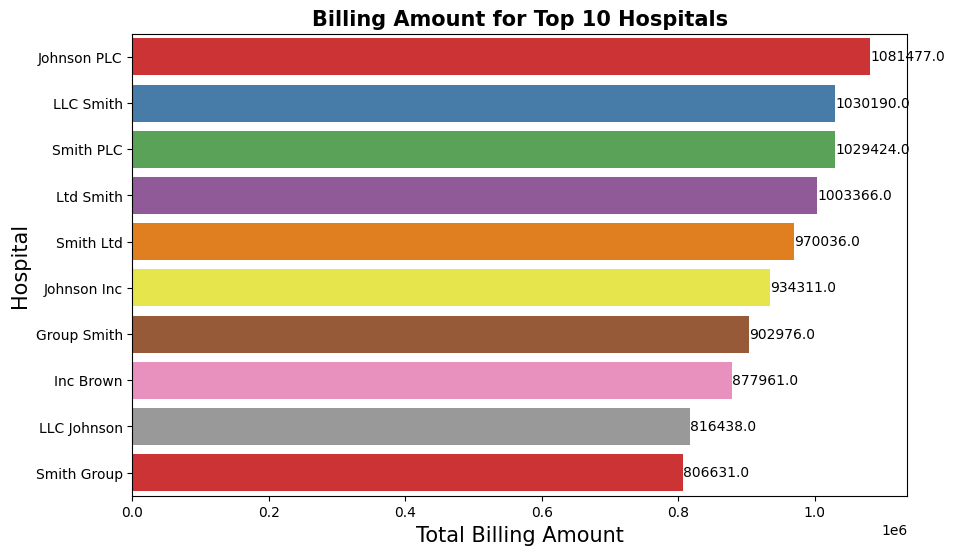

In [36]:
# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

***INTERPRETATION***

Smith and Sons has the highest average billing amount of 477639.

**Who are the top 20 doctors by billing amount?**

In [37]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = healthcare.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

,Doctor,Billing Amount
0,Michael Smith,784501.843132
1,John Smith,610109.604175
2,Robert Smith,609160.688766
3,Robert Johnson,524193.003178
4,David Smith,473345.609187
5,William Johnson,469198.116030
6,John Johnson,466769.966463
7,James Smith,461817.900317
8,Michael Johnson,460819.038528
9,David Johnson,445605.542275


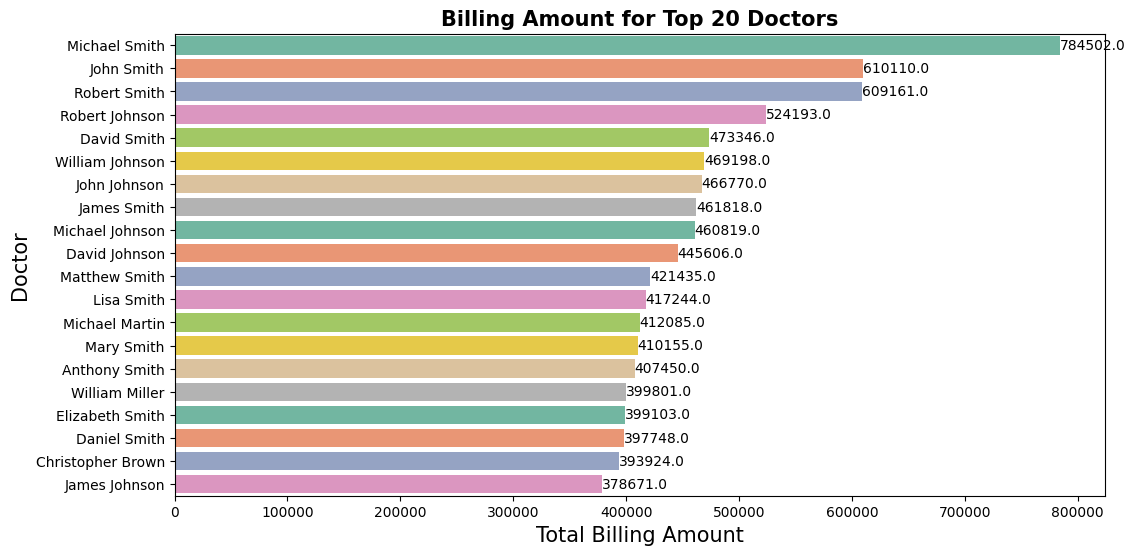

In [38]:
# plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= top20_doctors_billing['Billing Amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top20_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 20 Doctors',fontsize = 15, weight = 'bold')
plt.show()

***Interpretation***


Doctor Michael Johnson is the top doctor with a total billing amount of 181576.

**Which medical condition generated the highest average billing among male and female?**

In [39]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = healthcare.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,25337.234722
1,Arthritis,Male,25688.849297
2,Asthma,Female,25358.633474
3,Asthma,Male,25903.913291
4,Cancer,Female,25284.314393
5,Cancer,Male,25020.562355
6,Diabetes,Female,25558.060586
7,Diabetes,Male,25762.941146
8,Hypertension,Female,25434.788625
9,Hypertension,Male,25571.135120


/tmp/ipykernel_47/3987055781.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




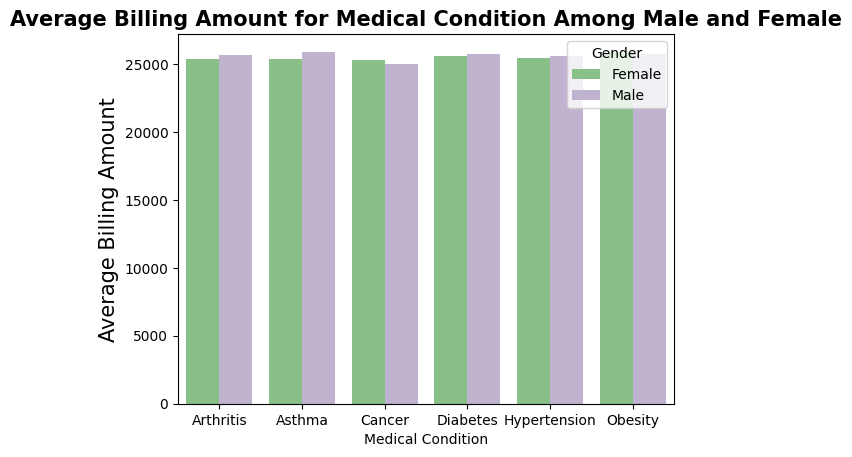

In [40]:
# plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 15, weight = 'bold')
plt.show()

**What is the distribution of different age groups?**

In [41]:
min_age = healthcare['Age'].min()
max_age = healthcare['Age'].max()
print(min_age,",",max_age)

13 , 89


In [42]:
healthcare['Age_Group'] = pd.cut(healthcare['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = healthcare['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

Age_Group
18-30      9489
51-60      8263
31-40      8105
61-70      8099
41-50      8045
71-80      7999
Over 80    4850
Name: count, dtype: int64

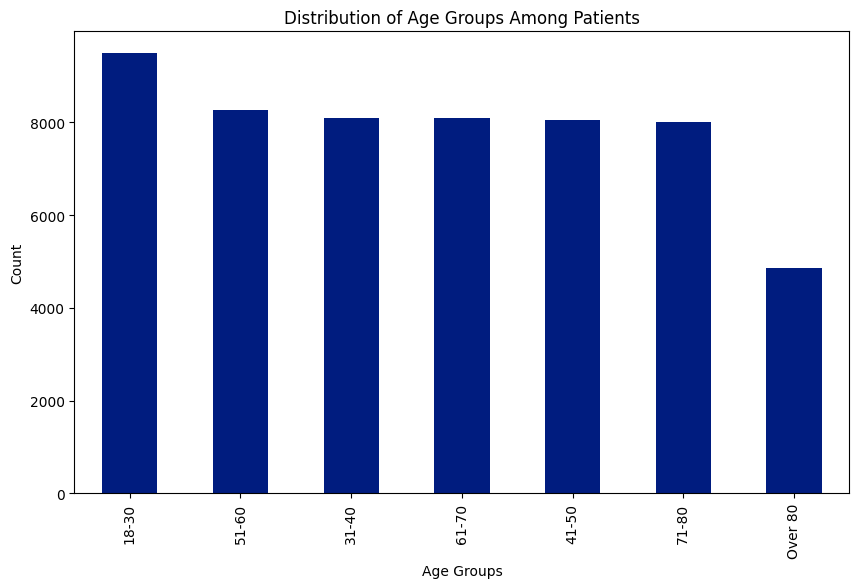

In [43]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

***Interpretation***

The maximum number of patients are in the range of 18-30.

**CONCLUSION**

- Compared to male, there are high female patients.
- Most patients have the blood type of **AB-**.
- Asthma is the major medical condition among patients.
- Cigna is the leading insurance provider.
- Pencilin is the most prescribed medication.